# 人工智能在医学中的应用：数据科学--机器学习
## Python 编程：使用 *scikit-learn* 进行机器学习

- **Instructor**: itwangyang (itwangyang@gmail.com) <br>
- **Target audience**: Medical students <br>
- **Course date**: September 15, 2024 <br>

> **注意：** 如果您在 Google Colab 之外使用此笔记本，**请确保您使用的是 Python 3.6 或更高版本**。

**执行下面的单元格应返回高于 3.6.0 的版本***。

In [42]:
!python --version

Python 3.9.15


## 1.本次的目标

本节课将作为上一节机器学习理论课之后的编程教程。我们将通过一个实际例子重温机器学习的基本概念。我们将使用 Python 编程语言，学习使用 Python 机器学习软件包 "*scikit-learn*"（以及 *pandas*、*numpy* 和 *matplotlib* 软件包）来训练不同类型的机器学习模型，并对它们进行比较。

## 2.学习目标

本节课结束时，您应该熟悉

- 如何读取数据集，探索不同的数据列，并在必要时对其进行清理，以便训练机器学习模型。

- 交叉验证：为什么要将数据集分为 "训练 "数据和 "测试 "数据，以及如何做到这一点。

- 学会识别手头的任务是*分类任务*还是*回归任务*。

- 训练两种不同的机器学习模型：

    - 支持向量机分类器 (SVC)
    
    - 逻辑回归

- 比较不同机器学习模型的性能，确定哪个更好。

## 3. References

Documentation for python libraries used in this notebook:

- https://scikit-learn.org/stable/
- https://pandas.pydata.org/pandas-docs/stable/
- https://numpy.org/doc/
- https://matplotlib.org/

Documentation for classifiers:

- https://en.wikipedia.org/wiki/Support_vector_machine
- https://en.wikipedia.org/wiki/Logistic_regression

Documentation for metrics used:

- https://en.wikipedia.org/wiki/Accuracy_and_precision
- https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

Further learning material:

- StatQuest's Machine learning lecture series on youtube: ([click here](https://www.youtube.com/playlist?list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF))<br>(Episodes: Introduction, Cross-validation, Confusion Matrix, Sensitivity and Specificity, k-nearest neighbor, linear / logistic regression, support vector machines)


## 4.理论

在实践环节中，我们将一并温习理论知识。

## 5.实用性

5.1 数据加载和探索<br>

5.2 数据预处理<br>

5.3 分类还是回归？<br>

5.4 将数据拆分为 "训练 "集和 "测试 "集<br> 

5.5 训练机器学习模型<br>

5.6 评估模型性能<br>

#### 5.1 数据加载和探索

* 在本教程中，我们将研究由 *Pima Indians Diabetes Database* 提供的数据集。该数据集免费[在此提供](https://www.kaggle.com/uciml/pima-indians-diabetes-database)。

* 我们的目标是建立一个机器学习模型，该模型可根据数据集中提供的几项诊断指标准确预测（诊断）患者是否患有糖尿病。

* 为了便于使用，我们将使用大型数据库的一个子集。在我们的子集中，我们只选取了至少 21 岁、具有皮马印第安血统的女性。您可以在我们的 github 存储库中找到这个数据子集：https://github.com/volkamerlab/ai_in_medicine/raw/master/data/ 。

*在这一部分中，你也将有机会应用之前编程课程中学到的知识。

供参考的数据源出版物：<br>

*Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988).使用 ADAP 学习算法预测糖尿病发病。In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265).IEEE 计算机协会出版社*。

让我们先加载数据集，并尝试了解所提供的不同列：

In [86]:
# First, import the Pandas, NumPy and matplotlib libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [87]:
# load the csv file as a pandas dataframe
df = pd.read_csv("data/diabetes.csv")

In [88]:
#see the loaded dataframe 
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


我们可以看到

- 数据集有 768 个研究对象，每个研究对象有 9 个变量：

    1.怀孕
    
    2.葡萄糖
    
    3.血压
    
    4.皮肤厚度
    
    5.胰岛素
    
    6.体重指数
    
    7.糖尿病血统功能
    
    8.年龄
    
    9.结果

- 最后一列 "结果 "表示糖尿病信息。如果数值为 "1"，则表示受试者患有糖尿病。

- 其余 8 列是已知与糖尿病相关的医学预测变量，它们**可能有助于我们更准确地预测糖尿病。

**我们的任务是利用这 8 个医学预测变量，尝试预测受试者是否患有糖尿病**（即预测 "结果 "变量）：

<img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/MLflowchart.png">

(*[链接到源图表](https://github.com/volkamerlab/ai_in_medicine/raw/master/images/MLflowchart.png)*)

**讨论：**

1.您认为其中哪些变量对糖尿病的医学诊断最有参考价值？

2.使用这些变量并准确诊断糖尿病的机器学习模型对医学领域是否有益？

让我们尝试将数据中糖尿病列的 "分布 "可视化。<br

我们可以使用 "pandas.Dataframe "的 "values_counts() "方法来打印糖尿病/非糖尿病受试者的计数。

In [46]:
# count the subject with and without diabetes
label = df["Outcome"] # first, select the 'Outcome' column from the dataframe
label_counts = label.value_counts() # next, use the pandas 'value_counts()' method 
# print the result
label_counts

Outcome
0    500
1    268
Name: count, dtype: int64

让我们通过绘制 "柱形 "图来使这些数字更加直观。<br>

我们可以使用 pandas.Dataframe 的 `plot()` 函数来实现这一功能。

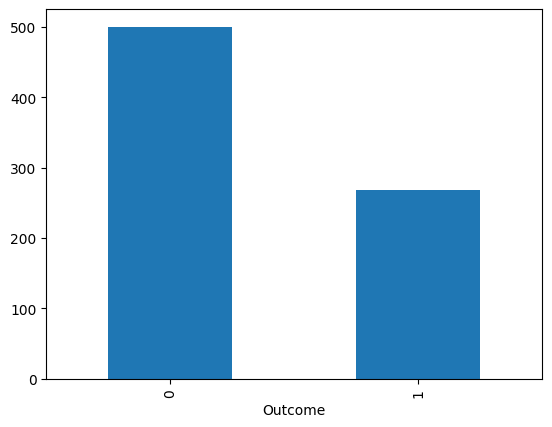

In [47]:
ax = label_counts.plot(kind="bar")

好吧，我们肯定可以再改进一下这个图表，让其他人也能看得明白。

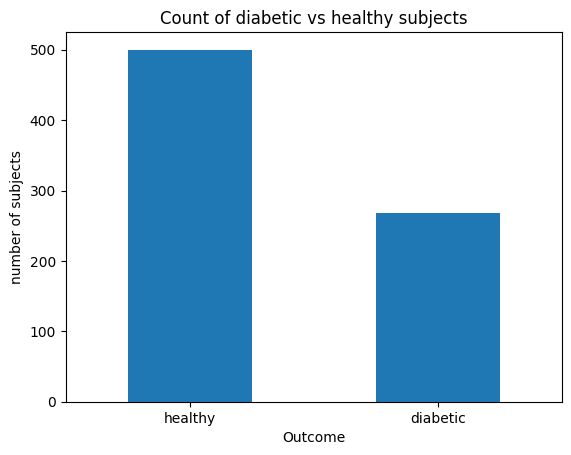

In [48]:
ax = label_counts.plot(kind="bar", 
                       title="Count of diabetic vs healthy subjects",
                       ylabel="number of subjects", 
                       rot=0)
tick_names = ax.set_xticklabels(["healthy", "diabetic"])

现在，让我们来可视化一下将作为机器学习模型输入的 athe 不同医疗变量的分布情况。

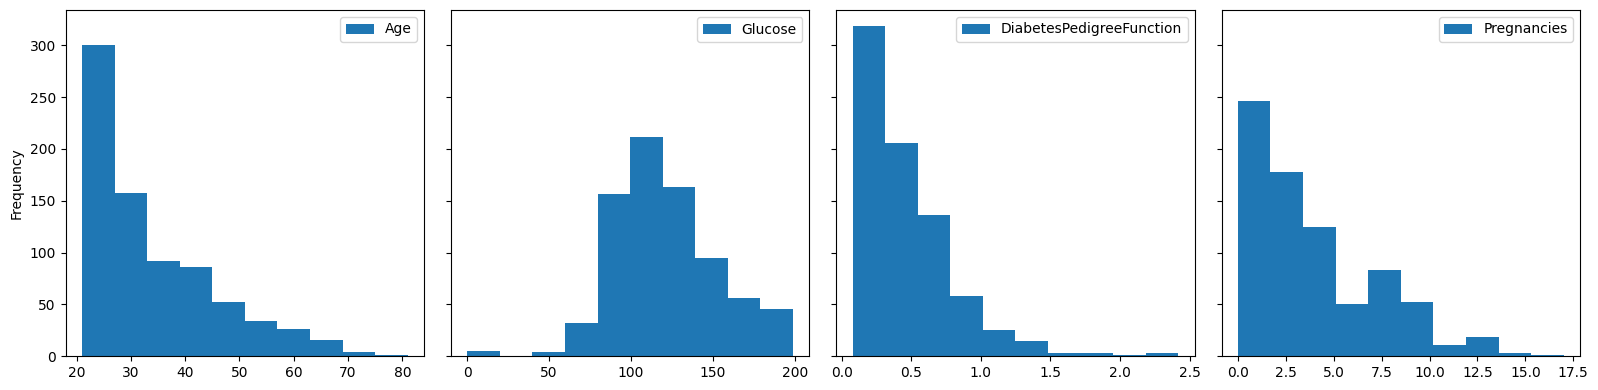

In [49]:
# first, create a canvas on which 1 x 4 graphs can be drawn
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,4))

df.plot(y="Age", kind="hist", ax=axes[0])
df.plot(y="Glucose", kind="hist", ax=axes[1])
df.plot(y="DiabetesPedigreeFunction", kind="hist", ax=axes[2])
df.plot(y="Pregnancies", kind="hist", ax=axes[3])

plt.tight_layout()
plt.show()

附注：我们还可以使用"密度"图来可视化相同的数据。

**练习：** 现在轮到你了。与上一单元中的做法类似，绘制数据集中其余 4 个变量的分布图：

1.体重指数

2.皮肤厚度

3.血压

4.胰岛素

In [89]:
# 您的代码放在这里

# 提示：从复制上面单元格的代码开始。

# 接下来，提供您希望可视化的列名。

<!-- f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,4))

df.plot(y="BMI", kind="hist", ax=axes[0])
df.plot(y="SkinThickness", kind="hist", ax=axes[1])
df.plot(y="BloodPressure", kind="hist", ax=axes[2])
df.plot(y="Insulin", kind="hist", ax=axes[3])

plt.tight_layout()
plt.show() -->

#### 5.2 数据预处理

一般来说，由于人为错误或数据收集过程中的系统性问题，大型数据集中的信息缺失或错误和无效值非常凌乱。因此，在实践中，你需要对数据进行预处理。否则，它们就不足以可靠地训练机器学习模型。

一些突出的预处理步骤包括：

* 剔除无效/非数字/乱码值

* 清除不需要的列

* 转换测量单位

* 使用平滑功能减少噪音

* 变量值的标准化和归一化：上一节理论课已讲过

**讨论：** 目前我们的数据集中是否存在此类差异？

有些受试者的 "葡萄糖 "值为 "0"，这不可能。也许这些受试者的数据没有收集到。

In [51]:
# print the count of subjects with Glucose == 0
(df['Glucose'] == 0)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Glucose, Length: 768, dtype: bool

In [52]:
(df['Glucose'] == 0).value_counts()

Glucose
False    763
True       5
Name: count, dtype: int64

# 👉🏻我不想写中文了，兄弟们，自己看不懂的，翻译一下哦！！！
## ❤️我只是感觉这些英语很基础了，你们可以学学了！！！
Let's drop these subjects from our data as they are probably not very reliable

In [53]:
# select only the subjects who have a 'Glucose' value 
df_clean = df[(df['Glucose'] != 0)]
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


It is the same case with 'BMI' where some subjects have '0'. Let's remove them too.

In [54]:
df_clean = df_clean[(df_clean['BMI'] != 0)]

**Exercise:** Similarly, lets also remove subjects with BloodPressure=0 as those are also probably incoherent data.

In [55]:
# YOUR CODE GOES HERE

<!--  df_clean = df_clean[(df_clean['BMI'] != 0)] -->

In [56]:
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 5.3 Classification or regression?

Is our task a classification task or a regression task?

<img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/classandregress.png" width="700" />

*([link to source image](http://tonyeiyalla.com/images/classandregress.png))*

Let's try to look at our data again. <br>
This time, let's use a 'scatter plot' to compare how 2 input variable relate to each others. 

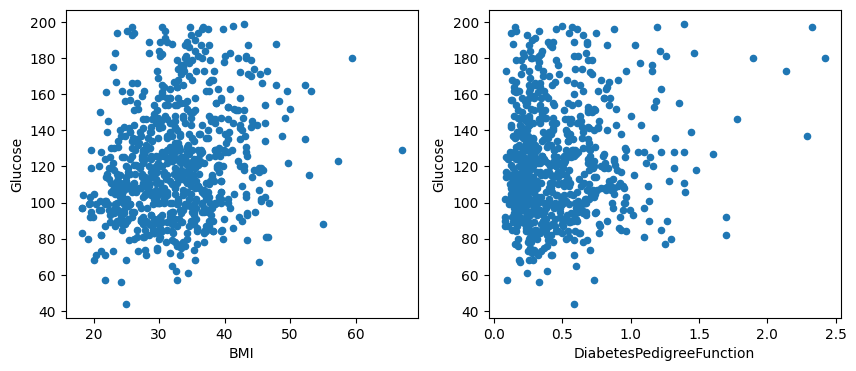

In [57]:
f, axes = plt.subplots(1, 2, figsize=(10,4))

# plot BMI vs Glucose 
ax1 = df_clean.plot(x="BMI", y="Glucose", kind="scatter", ax=axes[0])

# plot DiabetesPedigreeFunction vs Glucose 
ax2 = df_clean.plot(x="DiabetesPedigreeFunction", y="Glucose", kind="scatter", ax=axes[1])

plt.show()

Now, let's see how the output 'diabetes' variable relates to these relations.

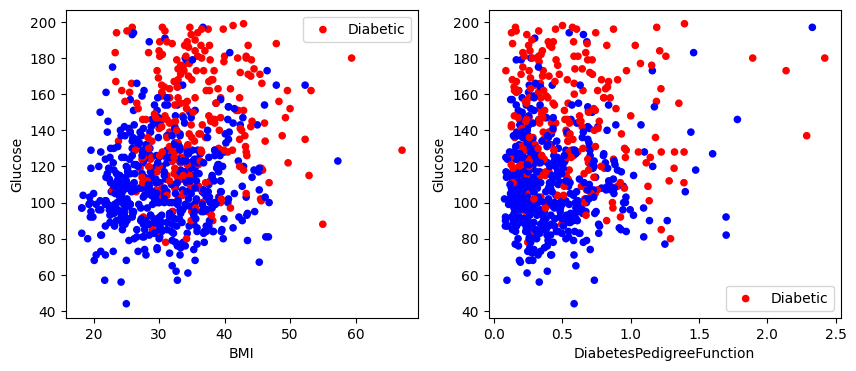

In [58]:
f, axes = plt.subplots(1, 2, figsize=(10,4))

# set a red color for diabetic subjects and blue for healthy subjects
label = df_clean['Outcome'].map({0:'blue', 1:'red'})

# plot BMI vs Glucose 
ax1 = df_clean.plot(x="BMI", y="Glucose", kind="scatter", ax=axes[0], c=label)
ax1.legend(["Diabetic", "Healthy"])

# plot DiabetesPedigreeFunction vs Glucose 
ax2 = df_clean.plot(x="DiabetesPedigreeFunction", y="Glucose", kind="scatter", ax=axes[1], c=label)
ax2.legend(["Diabetic", "Healthy"])

plt.show()

**Discussion:** 
1. Do you see a correlation between the "BMI" and "Glucose" scores?
2. What about between "BMI" and "DiabetesPedigreeFunction"?
3. If you had to draw a line to differentiate between diabetic and healthy subjects in the first plot, where would you put it?
4. Are we doing classification or regression?
5. If we were trying to predict 'Glucose' from 'BMI', would we be doing a classification or a regression?

Extract the 'X' and y for our machine learning model as numpy arrays:

In [59]:
X = df_clean[["Pregnancies","Glucose","BloodPressure","SkinThickness",
              "Insulin","BMI","DiabetesPedigreeFunction","Age"]].values
y = df_clean[["Outcome"]].values

In [60]:
# print the shapes of our numpy arrays
X.shape, y.shape

((752, 8), (752, 1))

### 5.4 Splitting the data into 'training' set and 'test' set

### Why do we need a test set?

Our goal is to be learn a (machine learning) model that **generalizes** well. <br>
Over-fitting problem in a classification task vs a regression task:
<table>
    <tr>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/tuning.png" width="300" />
        </td>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/fitting_data.png" width="800" />
        </td>
    </tr>
</table>

*([link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/tuning.png))*
*([link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/fitting_data.png))*

Therefore, we split our dataset into 2 subsets: 
1. A larger subset on which we will train our model called the 'training' set. 
2. A smaller subset on which we will 'test' the model. It is important that we evaluate our model on a subset of the data it has never seen before to ensure that we are not overfitting the data and that our model can generalize well to unseen data.

Let us use 20% of our data as the test set. The remainding 80% can be used to train the classifer. These ratios may vary depending on the size of the dataset we are using, but 20% to 80% is a good starting point.

In [61]:
# find out how many subject form '80%' in our data
round(len(X)*80/100)

602

In [62]:
x_train = X[:579]
x_test = X[579:]

y_train = y[:579]
y_test = y[579:]

(x_train.shape), (x_test.shape), (y_train.shape), (y_test.shape)

((579, 8), (173, 8), (579, 1), (173, 1))

Python has a machine learning library called '*sklearn*' that provides several convenient functions for machine learning:<br>
<img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/Scikit_learn_logo.png" width="300" /> 
*([link to source](https://en.wikipedia.org/wiki/Scikit-learn#/media/File:Scikit_learn_logo_small.svg))* <br>

*sklearn* library has a function called `train_test_split()` that can be used for splitting our dataset.

In [63]:
# import function for splitting our data 
from sklearn.model_selection import train_test_split

# Split the features and labels intro training and test sets by setting the test_size variable to 20%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

(x_train.shape), (x_test.shape), (y_train.shape), (y_test.shape)

((601, 8), (151, 8), (601, 1), (151, 1))

### 5.5 Train machine learning models

There are many different machine learning models. Just to name a few popular ones:
1. Linear Regression
2. Logistic Regression
3. Decision Tree
4. Linear Support Vector Machine Classifier (LinearSVC)
5. Non-linear Support Vector Machine Classifier (SVC)
6. Deep learning methods: 
    1. Feed-forward networks
    2. Convolutional neural networks (CNN)
    3. Recurrent neural networks (RNN)
    
We will try 3 different machine learning models for our task:
1. Linear Support Vector Machine Classifier (LinearSVC)
2. Non-linear Support Vector Machine Classifier (SVC)
3. Logistic Regression

Why do we need so many different models?
- In machine learning, the idea of using an algorithm is to figure out the relationship or function mapping between the features X and target y.
- Every machine learning algorithm makes its assumptions about the data based on which it generalizes and makes predictions. Its performance depends on how well the assumptions correlate with the underlying patterns in the data.
- No free lunch theorem: There is "no free lunch" (best predictions) without having the best knowledge of the underlying data. It is the job of the data scientist to determine what fits best with the data.

#### 5.5.1 Linear Support Vector Machine Classifier (LinearSVC)
To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. 

<img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/hyperplane.png" width="400" /> 

*([link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/hyperplane.png))* 


In [65]:
# import model classe from sklearn
from sklearn.svm import LinearSVC

# Create a model (also called creating an 'instance' of a model class in programming lingo) 
linsvc = LinearSVC(max_iter=2000)

# fit the model to our train data using a class method
linsvc.fit(x_train, y_train)

/opt/anaconda3/envs/AIDrugDesign/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/AIDrugDesign/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=2000)

In [66]:
y_train = y_train.ravel()
y_test = y_test.ravel()

Linearly seperable task vs non-linearly seperable task:
<table>
    <tr>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/linear_sep.png" width="300" />
        </td>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/non-linear_sep.png" width="300" />
        </td>
    </tr>
</table>

(*[link to source](https://github.com/volkamerlab/ai_in_medicine/raw/master/images/linear_sep.png)*)
(*[link to source](https://github.com/volkamerlab/ai_in_medicine/raw/master/images/non-linear_sep.png)*)

<img src="https://github.com/volkamerlab/ai_in_medicine/raw//master/images/sphx_glr_plot_iris_svc_001.png" width="700" />

(*[link to source](https://github.com/volkamerlab/ai_in_medicine/raw/master/images/sphx_glr_plot_iris_svc_001.png)*)

Reading the warning message from python, it appears as though our linear SVC did not converge. This may imply that our data is not linearly separable and maybe a different classifier is better suited for the classification task. Lets forget the linear SVC and try the other classifier methods.


#### 5.5.2 Non-linear Support Vector Machine Classifier (SVC) 
This is good for separating non-linearly separable data.<br>

In [67]:
# import model classe from sklearn
from sklearn.svm import SVC

# Instantiate an object of the model class
svc = SVC(probability=True) 
# We set probability to True when instantiating our SVC model to get a probability estimate of the labels.

# fit the model to our train data using a class method
svc.fit(x_train, y_train)

SVC(probability=True)

#### 5.5.3 Logistic Regression Classifier

A logistic regression classifier is also good for separating non-linearly separable data.

<img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/logistic_reg.png" width="400" /> *([link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/logistic_reg.png))* 


In [68]:
# import model from sklearn
from sklearn.linear_model import LogisticRegression

# Instantiate an object of the model class
logreg = LogisticRegression(max_iter=200) 
# We set the max iterations of our logistic classigier to 200 when we instantiate our class because it did not converges with the default value of 100.

# fit the model to our train data using a class method
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

Now that we have two model that have been fit to our training data, we can use our test data to evaluate them.

### 5.6 Evaluate model performance


#### 5.6.1 Make predictions

Lets make predictions on the test set that we will later compare to the respective true labels to evaluate of our model.

In [69]:
# import useful functions from the metrics module to evaluate our model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/opt/anaconda3/envs/AIDrugDesign/lib/python3.9/site-packages/sklearn/metrics/__init__.py)

In [70]:
# use the predict() method from our model classes to predict labels given the test set of features x_test.
y_pred_svc = svc.predict(x_test)
y_pred_log = logreg.predict(x_test)

#### 5.6.2 Accuracy

$\text{accuracy} = \frac{tp + tn}{tp + fp + tn + fn}$, is a measure of how well our classifier can determine the true labels of inputs. <br><br>
Here we will compute the accuracies of both of our models.

In [71]:
# we are using the model class method score() to return the accuracy of predictions from each model.
acc_svc = svc.score(x_test, y_test)
acc_log = logreg.score(x_test, y_test)
print('Accuracy of Support Vector classifier on test set: {:.1f}%'.format(acc_svc*100))
print('Accuracy of logistic regression classifier on test set: {:.1f}%'.format(acc_log*100))

Accuracy of Support Vector classifier on test set: 74.8%
Accuracy of logistic regression classifier on test set: 76.8%


Although accuracy is a common metric, it often does not tell the whole story.

We need other ways to assess how well our classifier performs.

#### 5.6.3 Outcomes of a classifier

_Successful predictions_ are only one of the possible outcomes of a prediction from a classifier. These outcomes can be generalized using the following four classes:

- True positives
- False positives
- True negatives
- False negatives

<table>
    <tr>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/confusion_matrix.png" width="500" />
        </td>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/confusion_matrix_pregnancy.png" width="500" />
        </td>
    </tr>
</table>

(*[link to source](https://dzone.com/articles/understanding-the-confusion-matrix)*)

#### 5.6.4 Confusion Matrices

We can visualize the distribution of prediction classes predicted using a classifier by plotting a confusion matrix. We now use the plot_confusion_matrix function we imported above to visualize the distribution of True Positives, False Positives, False Negatives, True Negatives for both of our classifiers.

NameError: name 'plot_confusion_matrix' is not defined

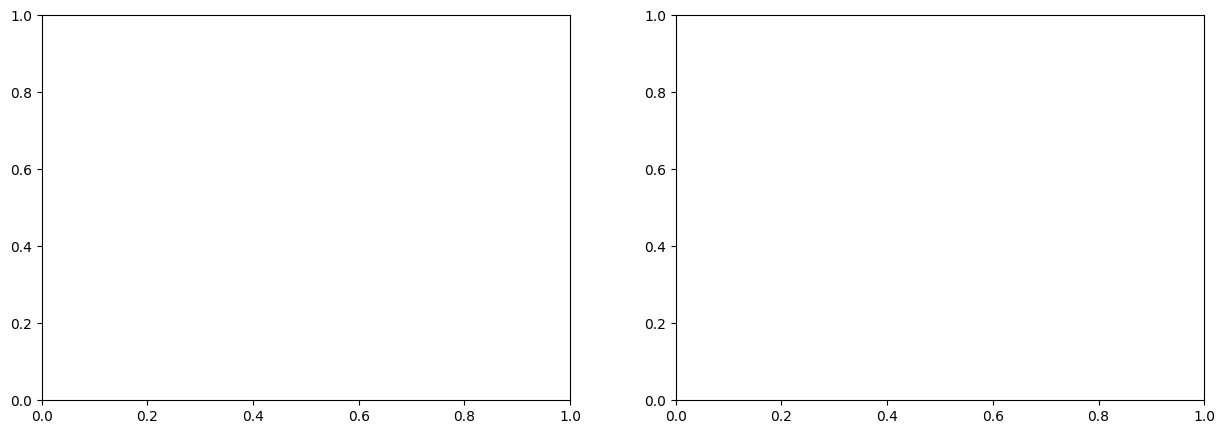

In [72]:
# Check the documentation to know what variables to use!
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))

plot_confusion_matrix(svc, x_test, y_test, ax=ax1) # , normalize='all'
ax1.set_title('Confusion Matrix - SVC') # , fontsize=20

plot_confusion_matrix(logreg, x_test, y_test, ax=ax2) # , normalize='all'
ax2.set_title('Confusion Matrix - LR') # , fontsize=20

plt.show()

#### 5.6.5 Receiver Operating Characteristic (ROC) Curve

- The ROC curve is a graphical method to summarise all possible confusion matrix of a model. 
- It shows the performance of a classification model at all thresholds. 
- It is a common choice for assessing a binary classifier. 
- The ROC curve is a plot of the True Positive Rate (recall) vs the False Positive Rate. 
- The diagonal line (C) represents the performance of a random classifier that has a 50% chance of outputting either label. 
- The area under the curve (AUC) of the ROC curve is a measure that tells us how well our classifier can distinguish between the classes.


<img src="https://github.com/volkamerlab/ai_in_medicine/raw/master/images/rocs.png" width="600" /> 

(*[link to source](https://github.com/volkamerlab/ai_in_medicine/raw/master/images/rocs.png)*)

In [73]:
svc_roc_auc = roc_auc_score(y_test, svc.predict(x_test))
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
print('ROC AUC score for Support Vector classifier on test set: {:.1f}%'.format(svc_roc_auc*100))
print('ROC AUC score for logistic regression classifier on test set: {:.1f}%'.format(logit_roc_auc*100))

ROC AUC score for Support Vector classifier on test set: 68.9%
ROC AUC score for logistic regression classifier on test set: 71.3%


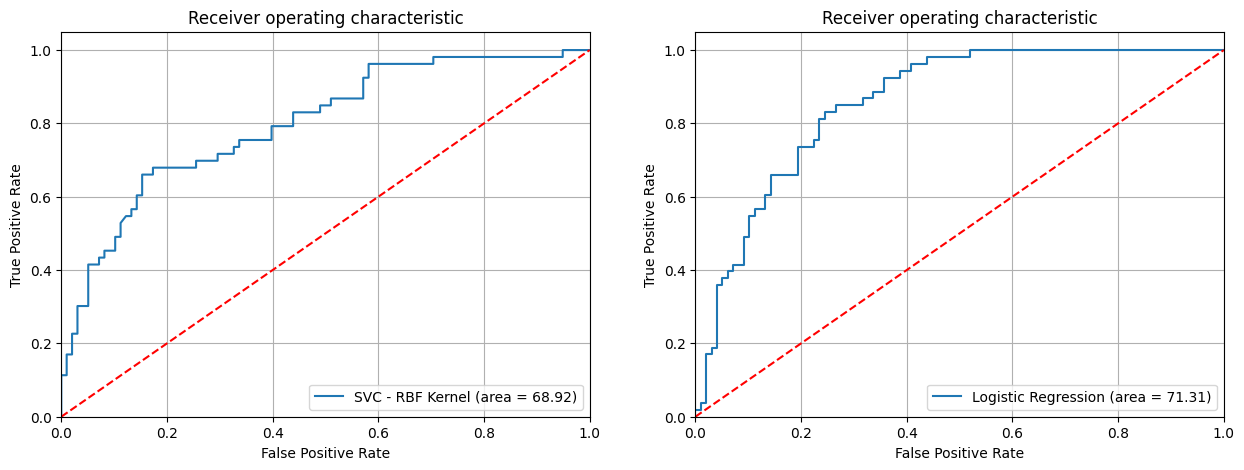

In [74]:
# create Figure, Axes objects and set figure dimensions
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))

# compute and plot the AUC and ROC values for the support vector classifier
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:,1])

ax1.plot(
    fpr, tpr, 
    label='SVC - RBF Kernel (area = {:.2f})'.format(svc_roc_auc*100)
)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver operating characteristic')
ax1.legend(loc="lower right")
ax1.grid()


# compute and plot the AUC and ROC values for the logistic regression classifier
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

ax2.plot(
    fpr, tpr, 
    label='Logistic Regression (area = {:.2f})'.format(logit_roc_auc*100)
)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver operating characteristic')
ax2.legend(loc="lower right")
ax2.grid()

plt.show()

**Discussion:** Which model do you think is better? 

In practice, data scientists also use n-fold cross-validation and permutation tests to better compare models, tune hyperparameters, and get better estimates for our metrics. <br>
This will result in a clearer picture of how the models preform, and which models to use for classification of novel data.

## 6. Summary

Lets briefly revisit some topics covered in this module:

- Machine learning is a task of learning models that can map input variables to desired outputs with high precision; features to labels
    - classification: outputs are discrete variables or classes
    - regression: outputs are continuous variables
- We can load our dataset in python from a csv file using pandas and explore it using different plotting types
    - normally we would have to preprocess our data
- Data is split up into training and test sets so that we can evaluate the model's generalization capacity on unseen data
- models are trained on the training set and their performance evaluated on the test set
- It is generally a good idea to use different metrics when evaluating a model 
    - this leads to a better understanding of how the model performs


## 7. Exercises
### Let us now use the different columns to predict if a subject's age is 35 years or older. 
Going through these exercises, you will develop a better undertanding of how to train and test models given a dataset. We suggest that you use the above code as a reference but do **NOT** simply copy and paste. You will gain a deeper understanding if your type the code yourself, implement the functions, and use docs to understand how functions work and what parameters to pass in.

Let's create a dataframe for our task

In [75]:
# set a common random seed to avoid getting very different scores due to model stochasticity
np.random.seed(0)

In [76]:
# add diabetes as another input variable
df_age = df_clean.rename(columns={"Outcome":"Diabetes"})
# Make age the new 'Outcome' variable
df_age["Outcome"] = (df_age["Age"] >= 35).astype(int)
df_age = df_age.drop(columns=["Age"])
df_age

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Diabetes,Outcome
0,6,148,72,35,0,33.6,0.627,1,1
1,1,85,66,29,0,26.6,0.351,0,0
2,8,183,64,0,0,23.3,0.672,1,0
3,1,89,66,23,94,28.1,0.167,0,0
4,0,137,40,35,168,43.1,2.288,1,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,1
764,2,122,70,27,0,36.8,0.340,0,0
765,5,121,72,23,112,26.2,0.245,0,0
766,1,126,60,0,0,30.1,0.349,1,1


### 7.1 Plot the new label's distribution or counts

In [77]:
# YOUR CODE GOES HERE
# Note: Play around with the plt methods and parameter to see how it changes the 
#       display of your plots.

<!-- 
ax = df_age["Outcome"].value_counts().plot(kind='bar',
                       title="Age<35 vs Age>=35",
                       ylabel="number of subjects", 
                       rot=0)
tick_names = ax.set_xticklabels(["Age<35", "Age>=35"])
plt.show()-->

### 7.2 Create the new X (features) and y (labels) variables

In [78]:
# YOUR CODE GOES HERE

<!-- X = df_age[["Pregnancies","Glucose","BloodPressure","SkinThickness",
              "Insulin","BMI","DiabetesPedigreeFunction","Age"]].values
y = df_age[["Outcome"]].values -->

In [79]:
# verification: this cell should return ((724, 8), (724, 1))
X.shape, y.shape 

((752, 8), (752, 1))

### 7.3 Split your data into training and test sets

You should use the `train_test_split` function imported from sklearn. We want you to use a test set size of 25%. 

Explicitly pass `shuffle=False` in `train_test_split` to make sure we all have the same train and test splits.

In [80]:
# YOUR CODE GOES HERE

<!-- x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) 
y_train = y_train.ravel()
y_test = y_test.ravel() -->

In [81]:
# verification: this cell should return numpy shapes ((543, 8), (181, 8), (543, 1), (181, 1))
(x_train.shape), (x_test.shape), (y_train.shape), (y_test.shape)

((601, 8), (151, 8), (601,), (151,))

### 7.4 Train your Models

Implement the non-linear SVC and Logistic Regression models and fit them to the training data.

In [82]:
# YOUR CODE GOES HERE
# Hint: Remember to compute the probabilities for SVC and make sure that the logistic regression 
#       model converges (by increasing the max_iter argument if necessary).

### 7.5 Evaluate your Models

#### 7.5.1 Predict the labels of the test set using both classifiers

In [83]:
# Hint: Use the predict method from the classifier class
# YOUR CODE GOES HERE

<!-- y_pred_svc = svc.predict(x_test)
y_pred_log = logreg.predict(x_test) -->

#### 7.5.3 Compute and print the Accuracy for both models

In [84]:
# Hint: Use the score method from each model class.
# YOUR CODE GOES HERE

<!-- acc_svc = svc.score(x_test, y_test)
acc_log = logreg.score(x_test, y_test)
print('Accuracy of Support Vector classifier on test set: {:.1f}%'.format(acc_svc*100))
print('Accuracy of logistic regression classifier on test set: {:.1f}%'.format(acc_log*100)) -->

#### 7.5.3 Plot the confusion matrices from each classifier

In [85]:
# Hint: Use the plot_confusion_matrix function import from sklearn
# YOUR CODE GOES HERE

<!-- fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))

plot_confusion_matrix(svc, x_test, y_test, ax=ax1) # , normalize='all'
ax1.set_title('Confusion Matrix - SVC') # , fontsize=20

plot_confusion_matrix(logreg, x_test, y_test, ax=ax2) # , normalize='all'
ax2.set_title('Confusion Matrix - LR') # , fontsize=20 

plt.show() -->

#### 7.5.4 Plot the ROC curves and compute the AUC for both classifiers

In [40]:
# Hint: Use the roc_auc_score and roc_curve functions
# YOUR CODE GOES HERE

<!-- fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))


# compute and plot the AUC and ROC values for the support vector classifier
svc_roc_auc = roc_auc_score(y_test, svc.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:,1])


ax1.plot(
    fpr, tpr, 
    label='SVC - RBF Kernel (area = {:0.2f})'.format(svc_roc_auc)
)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver operating characteristic')
ax1.legend(loc="lower right")
ax1.grid()


# compute and plot the AUC and ROC values for the logistic 
# regression classifier
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])


ax2.plot(
    fpr, tpr, 
    label='Logistic Regression (area = {:0.2f})'.format(logit_roc_auc)
)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver operating characteristic')
ax2.legend(loc="lower right")
ax2.grid()

plt.show() -->